# Notebook 1: Neural ODE 2D Classification

Este notebook implementa e treina Neural ODEs para classificação em dados 2D.

## Objetivos:
1. Implementar VectorField e NeuralODE com classificação
2. Treinar em dataset 2D sintético (moons, circles, spirals)
3. Visualizar trajetórias a partir de dados do dataset (x(0) → x(1))
4. Visualizar transformações a partir de z ~ N(0,I) (z(0) → x(1))
5. Visualizar vector fields
6. Analisar NFEs e comparar solvers


In [ ]:
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('..')
import torch
import torch.optim as optim
from src.models.neural_ode import NeuralODE
from src.models.vector_field import VectorField2D
from src.utils.datasets import Synthetic2D, get_dataloader
from src.utils.training import train_neural_ode
from src.utils.visualization import Synthetic2DViz

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Directories for saving figures and checkpoints
FIGURES_DIR = '../results/figures'
CHECKPOINTS_DIR = '../results/checkpoints'
os.makedirs(FIGURES_DIR, exist_ok=True)
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

# Dataset name for file naming

Using device: cuda


## 1. Carregar Dataset


Figure saved to: ../results/figures/01_spirals_neuralode.png


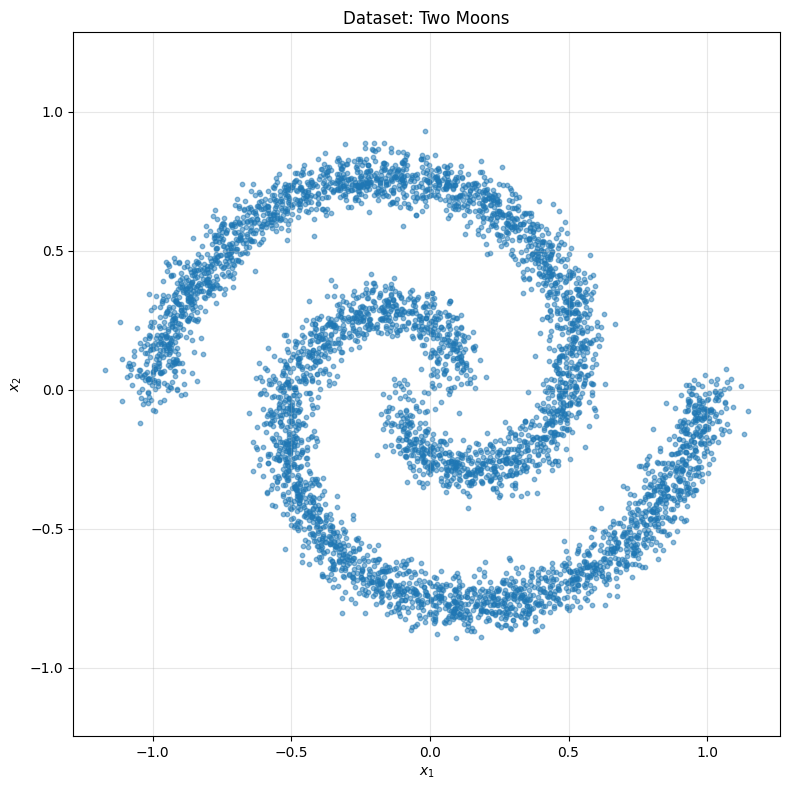

Dataset size: 5000


In [ ]:
DATASET_NAME = 'spirals'
# Criar dataset (moons, circles, ou spirals - todos têm 2 classes)
dataset = Synthetic2D(n_samples=5000, noise=0.05, dataset_type=DATASET_NAME)
dataloader = get_dataloader(dataset, batch_size=128, shuffle=True)

# Visualizar dados com cores por classe
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
Synthetic2DViz.plot_data_distribution(
    dataset.data,
    ax=ax,
    title="Dataset: Two Moons",
    save_path=os.path.join(FIGURES_DIR, f'01_{DATASET_NAME}_neuralode.png')
)
plt.tight_layout()
plt.show()
print(f"Dataset size: {len(dataset)}")

## 2. Criar e Treinar Modelo


In [ ]:
# Criar modelo com classificação (2 classes para moons/circles/spirals)
vf = VectorField2D(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-5,
    atol=1e-5,
).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Treinar para classificação
train_neural_ode(
    model,
    dataloader,
    optimizer,
    n_epochs=50,
    n_steps=20,
    n_samples=10,
)

# Salvar checkpoint
checkpoint_path = os.path.join(
    CHECKPOINTS_DIR,
    f'01__{DATASET_NAME}_neuralode.pt'
)
torch.save(model.state_dict(), checkpoint_path)
print(f"Checkpoint saved to: {checkpoint_path}")


Epoch 1/50: 100%|██████████| 40/40 [00:05<00:00,  7.90it/s]


Epoch 1, Loss: 0.469401 


Epoch 2/50: 100%|██████████| 40/40 [00:04<00:00,  8.00it/s]


Epoch 2, Loss: 0.452087 


Epoch 3/50: 100%|██████████| 40/40 [00:05<00:00,  7.64it/s]


Epoch 3, Loss: 0.450543 


Epoch 4/50: 100%|██████████| 40/40 [00:05<00:00,  7.71it/s]


Epoch 4, Loss: 0.454510 


Epoch 5/50: 100%|██████████| 40/40 [00:05<00:00,  7.63it/s]


Epoch 5, Loss: 0.463049 


Epoch 6/50: 100%|██████████| 40/40 [00:05<00:00,  7.61it/s]


Epoch 6, Loss: 0.430476 


Epoch 7/50: 100%|██████████| 40/40 [00:05<00:00,  7.74it/s]


Epoch 7, Loss: 0.437837 


Epoch 8/50: 100%|██████████| 40/40 [00:05<00:00,  7.34it/s]


Epoch 8, Loss: 0.427785 


Epoch 9/50: 100%|██████████| 40/40 [00:05<00:00,  7.47it/s]


Epoch 9, Loss: 0.431274 


Epoch 10/50: 100%|██████████| 40/40 [00:05<00:00,  7.79it/s]


Epoch 10, Loss: 0.430602 


Epoch 11/50: 100%|██████████| 40/40 [00:05<00:00,  7.12it/s]


Epoch 11, Loss: 0.409038 


Epoch 12/50: 100%|██████████| 40/40 [00:08<00:00,  4.72it/s]


Epoch 12, Loss: 0.416590 


Epoch 13/50: 100%|██████████| 40/40 [00:05<00:00,  7.50it/s]


Epoch 13, Loss: 0.401789 


Epoch 14/50: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]


Epoch 14, Loss: 0.413528 


Epoch 15/50: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]


Epoch 15, Loss: 0.399769 


Epoch 16/50: 100%|██████████| 40/40 [00:07<00:00,  5.55it/s]


Epoch 16, Loss: 0.399448 


Epoch 17/50: 100%|██████████| 40/40 [00:05<00:00,  6.74it/s]


Epoch 17, Loss: 0.395723 


Epoch 18/50: 100%|██████████| 40/40 [00:06<00:00,  5.86it/s]


Epoch 18, Loss: 0.392598 


Epoch 19/50: 100%|██████████| 40/40 [00:06<00:00,  6.17it/s]


Epoch 19, Loss: 0.397491 


Epoch 20/50:  75%|███████▌  | 30/40 [00:08<00:02,  3.68it/s]


KeyboardInterrupt: 

## 3. Visualizar Trajetórias


Figure saved to: ../results/figures/01_spirals_neuralode_trajectories.png


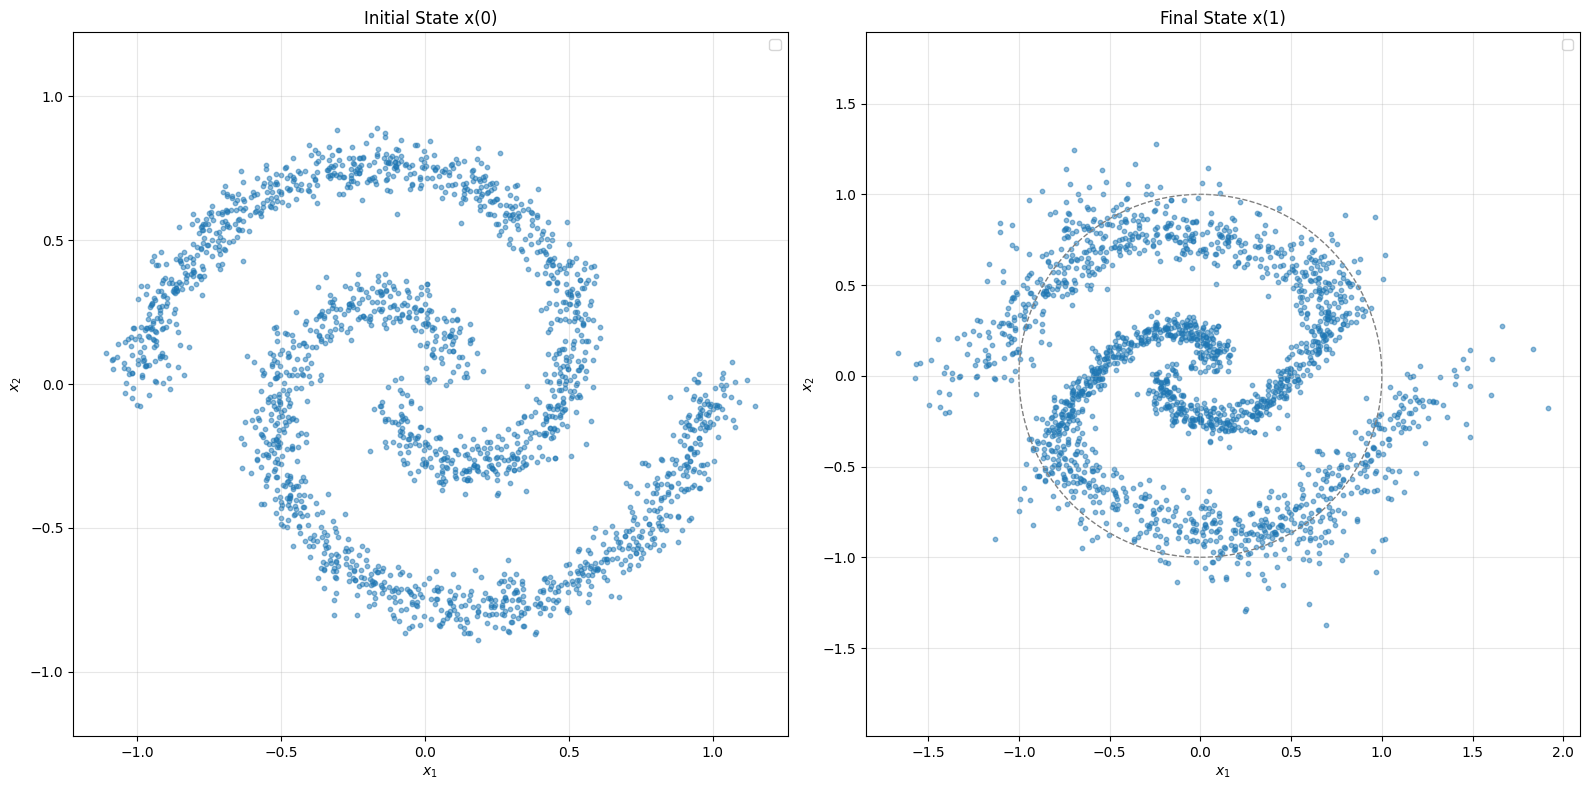

In [ ]:
# Carregar modelo do checkpoint
checkpoint_path = os.path.join(
    CHECKPOINTS_DIR,
    f'01__{DATASET_NAME}_neuralode.pt'
)
vf = VectorField2D(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-5,
    atol=1e-5,
).to(device)
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

Synthetic2DViz.plot_trajectories(
    model,
    dataset,
    n_samples=2000,
    n_steps=100,
    save_path=os.path.join(
        FIGURES_DIR,
        f'01_{DATASET_NAME}_neuralode_trajectories.png'
    )
)
plt.tight_layout()
plt.show()


## 4. Visualizar Vector Field


Figure saved to: ../results/figures/01_spirals_neuralode_vector_fields.png
Figure saved to: ../results/figures/01_spirals_neuralode_vector_fields.png
Figure saved to: ../results/figures/01_spirals_neuralode_vector_fields.png


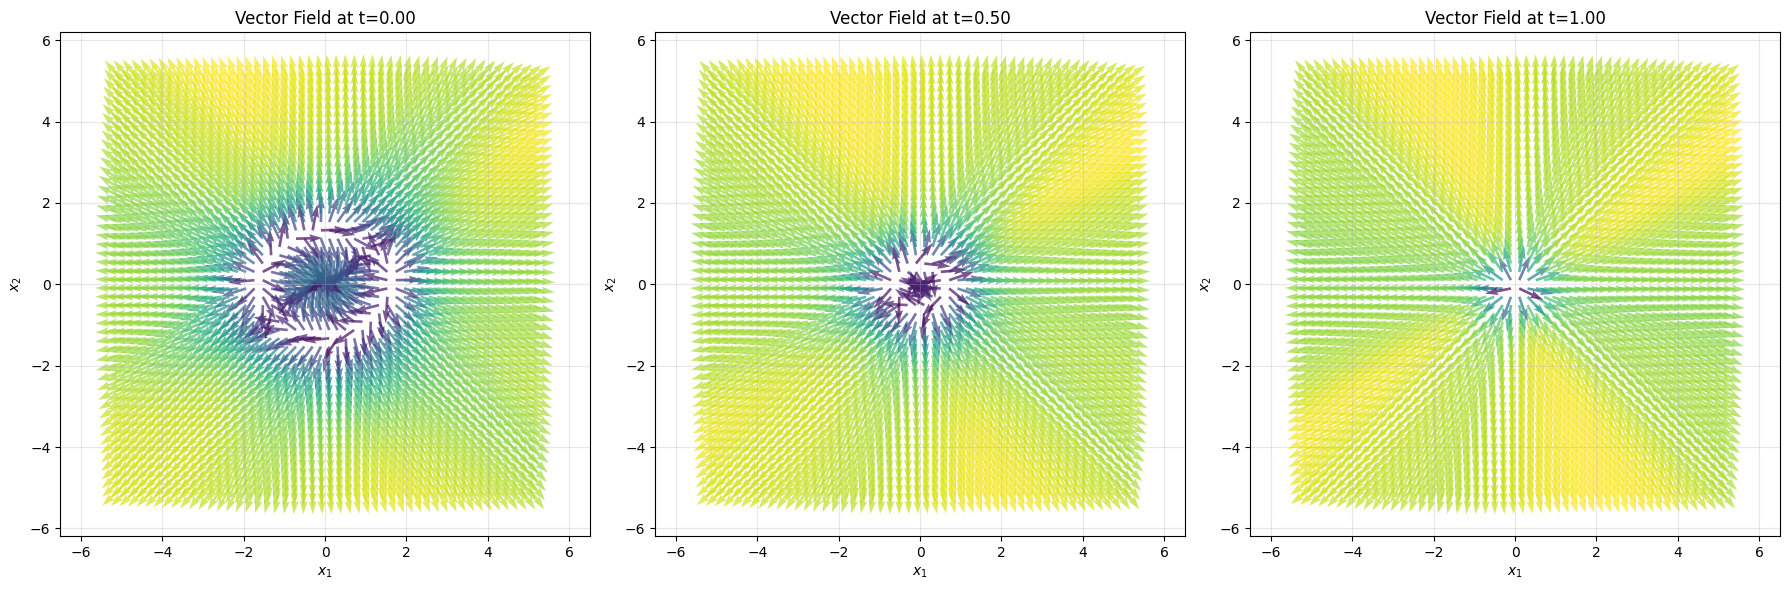

In [ ]:
# Carregar modelo do checkpoint
checkpoint_path = os.path.join(
    CHECKPOINTS_DIR,
    f'01__{DATASET_NAME}_neuralode.pt'
)
vf = VectorField2D(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-5,
    atol=1e-5,
).to(device)
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

# Plotar vector field em diferentes tempos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, t in enumerate([0.0, 0.5, 1.0]):
    Synthetic2DViz.plot_vector_field(
        model,
        xlim=(-5, 5),
        ylim=(-5, 5),
        n_grid=50,
        t=t,
        ax=axes[i],
        save_path=os.path.join(
            FIGURES_DIR,
            f'01_{DATASET_NAME}_neuralode_vector_fields.png'
        )
    )
plt.tight_layout()
plt.show()

## 5. Visualizar Transformação


Figure saved to: ../results/figures/01_spirals_neuralode_transformation.png


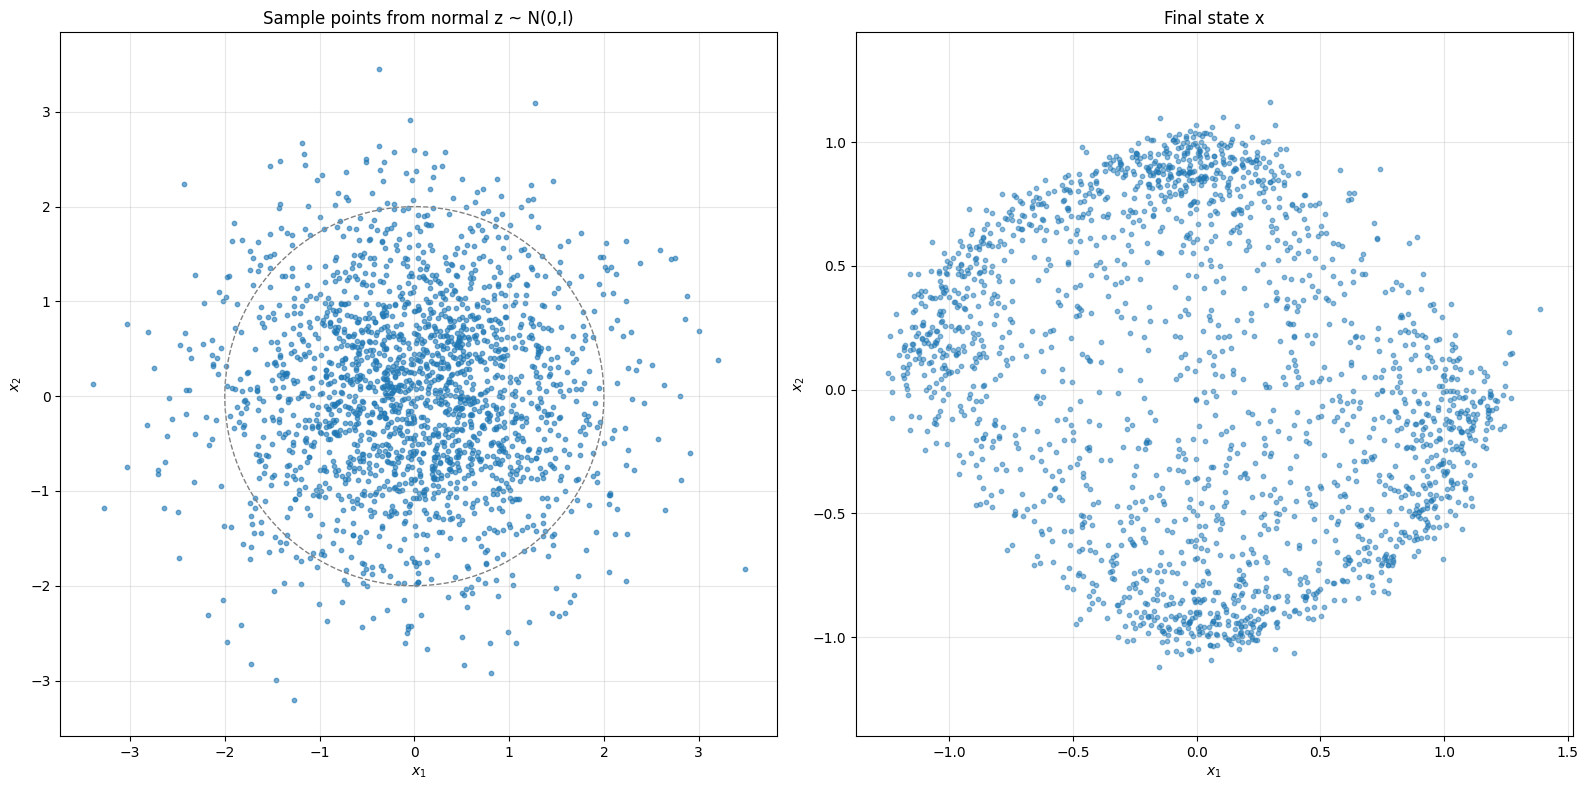

In [ ]:
# Carregar modelo do checkpoint
checkpoint_path = os.path.join(
    CHECKPOINTS_DIR,
    f'01__{DATASET_NAME}_neuralode.pt'
)
vf = VectorField2D(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-5,
    atol=1e-5,
).to(device)
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

Synthetic2DViz.plot_transformation(
    model,
    n_samples=2000,
    n_steps=100,
    save_path=os.path.join(
        FIGURES_DIR,
        f'01_{DATASET_NAME}_neuralode_transformation.png'
    )
)
plt.tight_layout()
plt.show()


## 6. Animação GIF da Transformação


In [ ]:
# Carregar modelo do checkpoint
checkpoint_path = os.path.join(
    CHECKPOINTS_DIR,
    f'01__{DATASET_NAME}_neuralode.pt'
)
vf = VectorField2D(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-5,
    atol=1e-5,
).to(device)
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

# Gerar GIF mostrando a transformação da distribuição de dados ao longo do tempo
gif_path = os.path.join(
    FIGURES_DIR,
    f'01_{DATASET_NAME}_neuralode_transformation.gif'
)
print(f"Gerando GIF de transformação: {gif_path}")
Synthetic2DViz.plot_transformation_gif(
    model=model,
    dataset=dataset,
    n_steps=100,
    n_samples=500,  # Usar subconjunto para geração mais rápida
    save_path=gif_path,
    xlim=(-1, 1),
    ylim=(-1, 1),
    fps=10
)
print(f"GIF salvo em: {gif_path}")


Gerando GIF de transformação: ../results/figures/01_spirals_neuralode_transformation.gif
Generating 100 frames...
  Frame 10/100
  Frame 20/100
  Frame 30/100
  Frame 40/100
  Frame 50/100
  Frame 60/100
  Frame 70/100
  Frame 80/100
  Frame 90/100
  Frame 100/100
Saving GIF to: ../results/figures/01_spirals_neuralode_transformation.gif
GIF saved successfully!
GIF salvo em: ../results/figures/01_spirals_neuralode_transformation.gif
